## 3.2.6: Challenge: Random Forest
## Kevin Hahn

I put my Random Forest Classifier model in the top cell. I transformed the X variables using logarithim transformation and performed feature reduction using the correlation heatmap findings. The X variables of cell size, bare nuclei, and normal nucleoli were very good predictors of either stage 2 or stage 4 cancer, with cell size having the highest importance rating of 0.41.


[ 0.89855072  0.94202899  0.95652174  0.94202899  0.97058824  0.92647059
  0.98529412  0.97058824  0.97058824  0.98507463]


        imp         features
1  0.373562      bare_nuclei
2  0.317498  normal_nucleoli
0  0.308940        cell_size


--- 0.2312908172607422 seconds ---


--- 0.00455927848815918 seconds ---


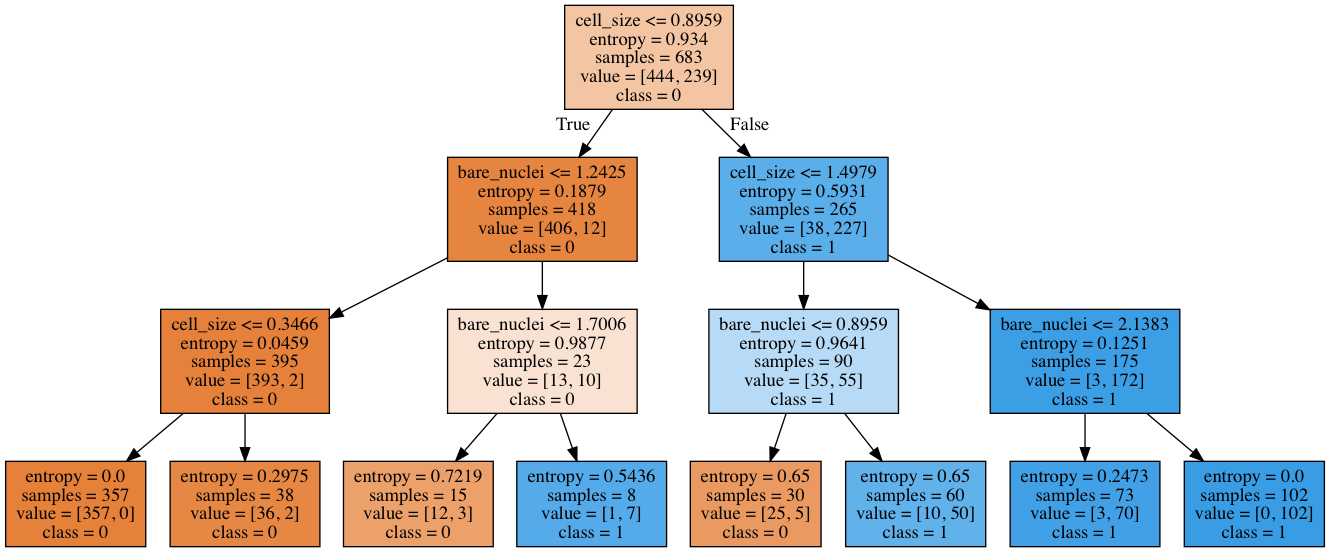

In [190]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()

X = dataframe[['cell_size', 'bare_nuclei', 'normal_nucleoli']]
# Y already equals 0 or 1 for stage 2 or stage 4 cancer

X = pd.get_dummies(X)

results = cross_val_score(rfc, X, Y, cv=10)
print(results)

feature_values = pd.DataFrame()
feature_values['imp']= rfc.fit(X, Y).feature_importances_
features_list = feature_values['features'] = X.columns

print("")
print("")
print(feature_values.sort_values(by='imp', ascending=False))
print("")
print("")
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=3,
#     random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['0', '1'],
    filled=True
)


print("")
print("")
print("--- %s seconds ---" % (time.time() - start_time))

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())





In [171]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import seaborn as sns

In [172]:
dataframe = pd.read_csv("~/Documents/cancer-wisc2.csv", header=None, dtype="int")

dataframe.columns = ['id', 'clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli','mitoses', 'class']

dataframe = dataframe.replace(to_replace=-1, value=np.nan)

dataframe = dataframe.drop('id', 1)

dataframe.dropna()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [175]:
dataframe['class'].unique()

array([2, 4])

In [174]:
dataframe.dtypes

clump_thickness        int64
cell_size              int64
cell_shape             int64
marginal_adhesion      int64
epithelial_size        int64
bare_nuclei          float64
bland_chromatin        int64
normal_nucleoli        int64
mitoses                int64
class                  int64
dtype: object

In [178]:
X = dataframe[['clump_thickness', 'cell_size', 'cell_shape', 
               'marginal_adhesion', 'epithelial_size', 'bare_nuclei', 
               'bland_chromatin', 'normal_nucleoli','mitoses']]
Y = dataframe['class']

Y = Y.apply(lambda x: 1 if x > 0.694 else 0)

In [179]:
Y.describe()

count    683.000000
mean       0.349927
std        0.477296
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

In [180]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()

X = pd.get_dummies(X)

results = cross_val_score(rfc, X, Y, cv=10)
print(results)

feature_values = pd.DataFrame()
feature_values['imp']= rfc.fit(X, Y).feature_importances_
features_list = feature_values['features'] = X.columns

feature_values.sort_values(by='imp', ascending=False)

print("--- %s seconds ---" % (time.time() - start_time))

[ 0.91304348  0.94202899  0.95652174  0.94202899  0.98529412  0.95588235
  0.97058824  0.98529412  1.          0.98507463]
--- 0.23848295211791992 seconds ---


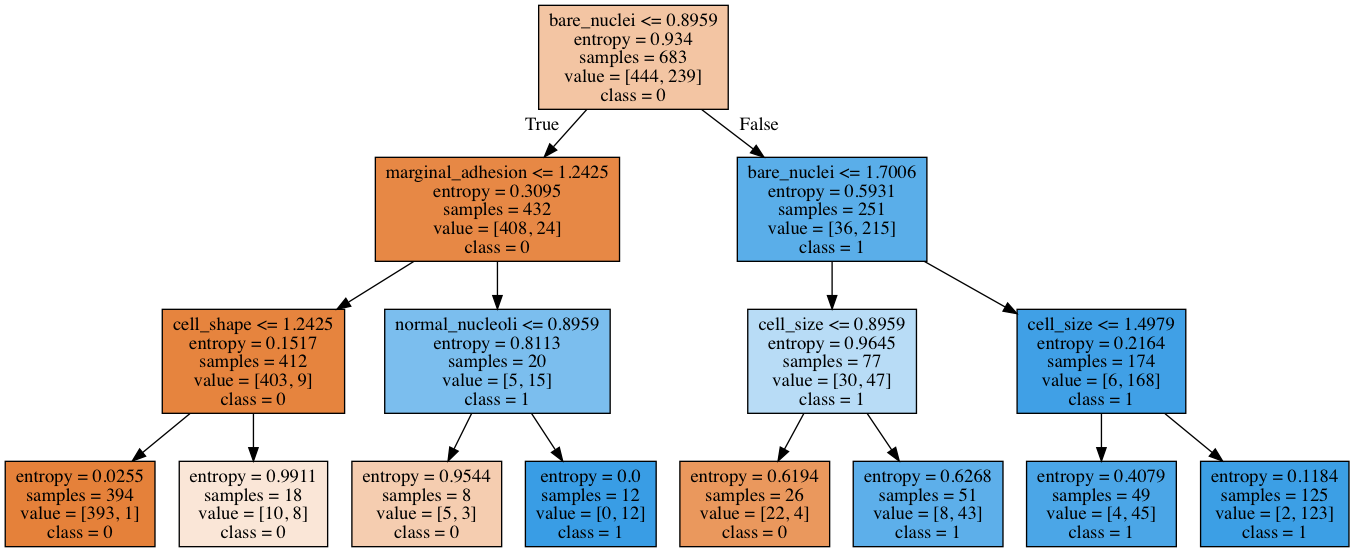

In [181]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=3,
#     random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['0', '1'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

[ 0.92753623  0.91304348  0.95652174  0.94202899  0.98529412  0.95588235
  0.98529412  0.97058824  0.97058824  1.        ]
--- 0.3031899929046631 seconds ---


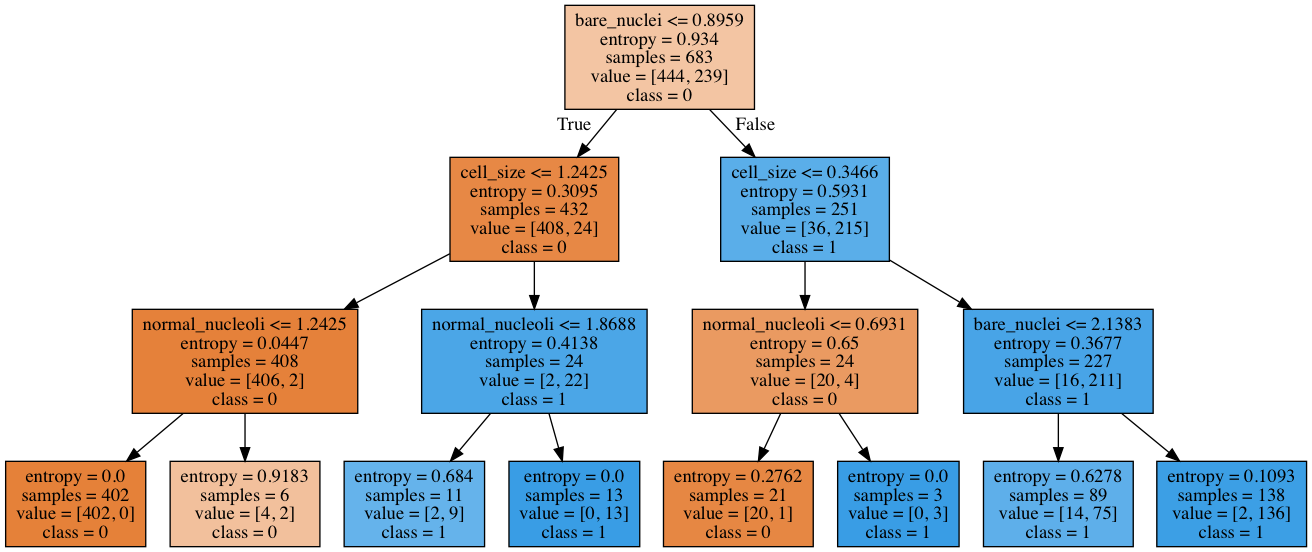

In [182]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()

X = dataframe[['cell_size', 'bare_nuclei', 'normal_nucleoli']]
#Y already equals 0 or 1 for stage 2 or stage 4 cancer

X = pd.get_dummies(X)

results = cross_val_score(rfc, X, Y, cv=10)
print(results)

feature_values = pd.DataFrame()
feature_values['imp']= rfc.fit(X, Y).feature_importances_
features_list = feature_values['features'] = X.columns

feature_values.sort_values(by='imp', ascending=False)

print("--- %s seconds ---" % (time.time() - start_time))

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=3,
#     random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['0', '1'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

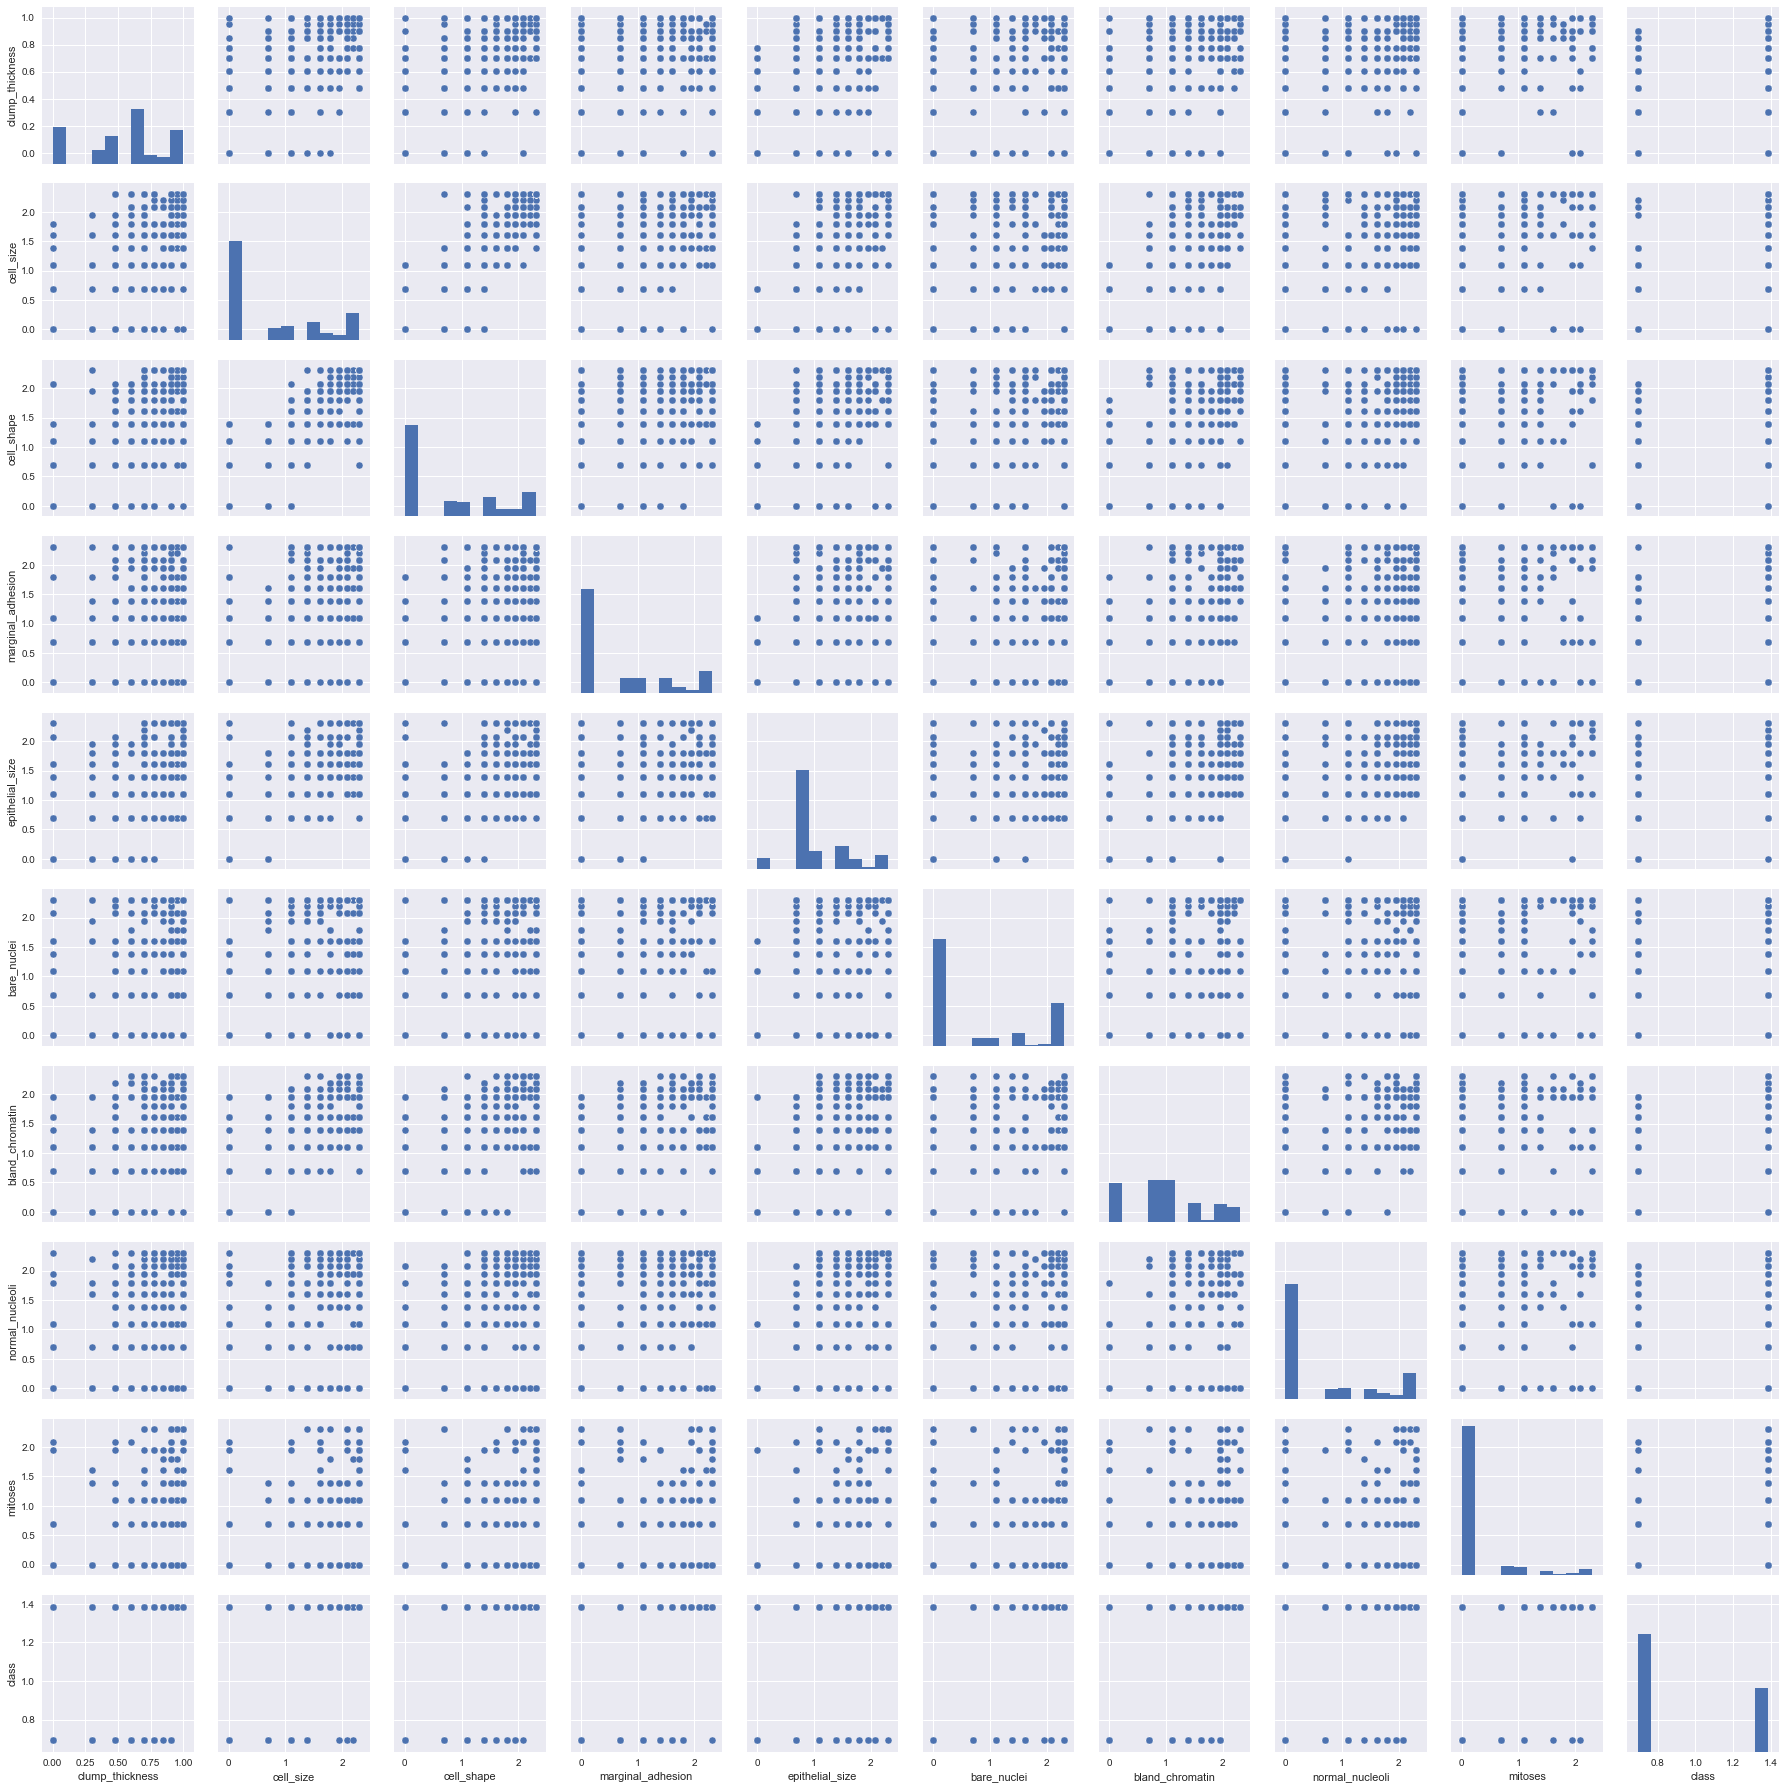

In [138]:
sns.pairplot(dataframe)
## corrmap, feature reduction?


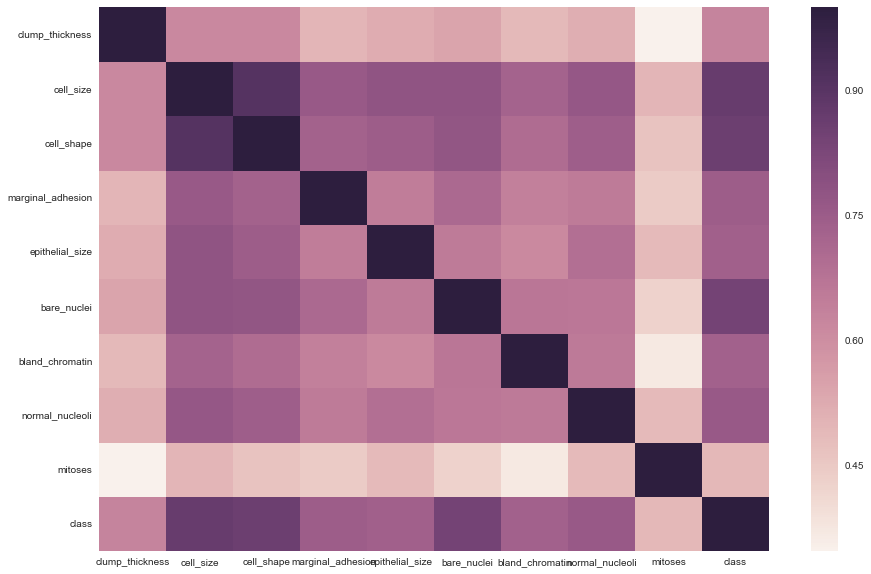

In [139]:
fig, ax = plt.subplots(figsize=(15,10))

corrmap = dataframe.corr()
sns.heatmap(corrmap)

In [176]:
dataframe.clump_thickness = dataframe.clump_thickness.apply(lambda x: float(x))
dataframe.cell_size = dataframe.cell_size.apply(lambda x: float(x))
dataframe.cell_shape = dataframe.cell_shape.apply(lambda x: float(x))
dataframe.marginal_adhesion = dataframe.marginal_adhesion.apply(lambda x: float(x))
dataframe.epithelial_size = dataframe.epithelial_size.apply(lambda x: float (x))
dataframe.bare_nuclei = dataframe.bare_nuclei.apply(lambda x: float(x))
dataframe.bland_chromatin = dataframe.bland_chromatin.apply(lambda x: float(x))
dataframe.normal_nucleoli = dataframe.normal_nucleoli.apply(lambda x: float(x))
dataframe.mitoses = dataframe.mitoses.apply(lambda x: float(x))
dataframe['class'] = dataframe['class'].apply(lambda x: float(x))
dataframe = dataframe.dropna()

In [177]:
dataframe.clump_thickness = dataframe.clump_thickness.apply(lambda x: math.log(x, 10))
dataframe.cell_size = dataframe.cell_size.apply(lambda x: math.log(x))
dataframe.cell_shape = dataframe.cell_shape.apply(lambda x: math.log(x))
dataframe.marginal_adhesion = dataframe.marginal_adhesion.apply(lambda x: math.log(x))
dataframe.epithelial_size = dataframe.epithelial_size.apply(lambda x: math.log(x))
dataframe.bare_nuclei = dataframe.bare_nuclei.apply(lambda x: math.log(x))
dataframe.bland_chromatin = dataframe.bland_chromatin.apply(lambda x: math.log(x))
dataframe.normal_nucleoli = dataframe.normal_nucleoli.apply(lambda x: math.log(x))
dataframe.mitoses = dataframe.mitoses.apply(lambda x: math.log(x))
dataframe['class'] = dataframe['class'].apply(lambda x: math.log(x))

In [137]:
dataframe.clump_thickness.unique()

array([ 0.69897   ,  0.47712125,  0.77815125,  0.60205999,  0.90308999,
        0.        ,  0.30103   ,  0.84509804,  1.        ,  0.95424251])